#**UNEMPLOYMENT ANALYSIS WITH PYTHON**

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

#**Author:Rudranarayan Baral**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
data=pd.read_csv("Unemployment in India.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
 7   year                                      740 non-null    int64  
 8   month                                     740 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 57.8+ KB


In [ ]:

data.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
749,False,False,False,False,False,False,False,False,False
750,False,False,False,False,False,False,False,False,False
751,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
data =data.dropna()

In [ ]:
data['year'] = pd.DatetimeIndex(data[' Date']).year
data['month'] = pd.DatetimeIndex(data[' Date']).month

In [ ]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019,9
...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,2020,2
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,2020,3
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,2020,4
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,2020,5


In [ ]:
df = data.astype({' Estimated Unemployment Rate (%)':'float',' Estimated Employed':'float', ' Estimated Labour Participation Rate (%)':'float'})


In [ ]:
import seaborn as sns
import matplotlib as plt

<Axes: title={'center': 'Estimated Unemployment Rate per region'}, xlabel='Region'>

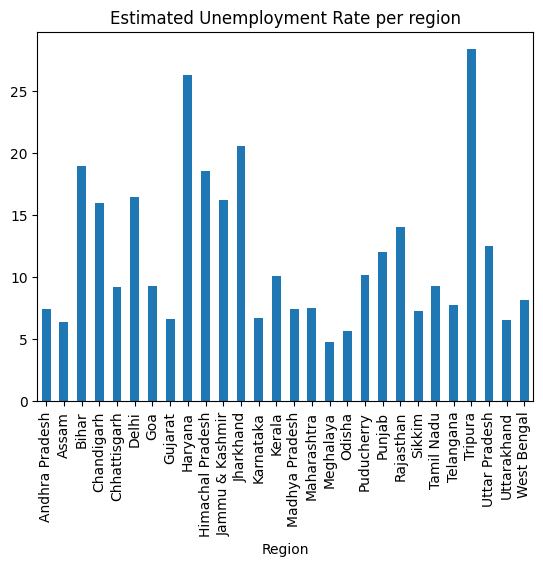

In [ ]:
region_unemployment = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
region_unemployment.plot(kind='bar', title='Estimated Unemployment Rate per region')

<Axes: title={'center': 'Estimated Unemployment Rate according to area'}, xlabel='Area'>

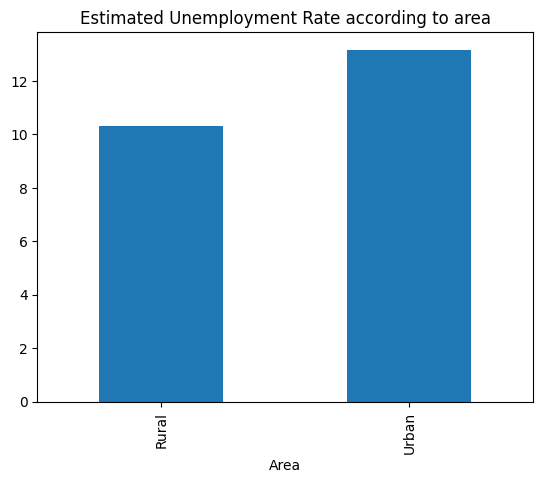

In [ ]:
Area_unemployment = data.groupby('Area')[' Estimated Unemployment Rate (%)'].mean()
Area_unemployment.plot(kind='bar', title='Estimated Unemployment Rate according to area')

<Axes: title={'center': 'Estimated Unemployment Rate per year'}, xlabel='year'>

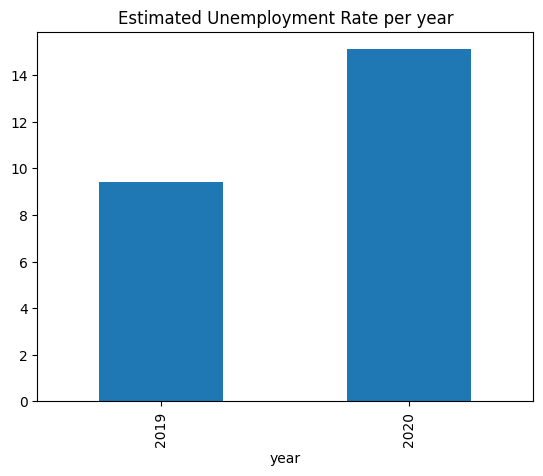

In [ ]:
year_unemployment = data.groupby('year')[' Estimated Unemployment Rate (%)'].mean()
year_unemployment.plot(kind='bar',title='Estimated Unemployment Rate per year' )

In [ ]:
df_2020 = data[data['year'] == 2020]
df_2019 = data[data['year'] == 2019]

<Axes: title={'center': 'Estimated Unemployment rate per month of year 2020'}, xlabel='year,month'>

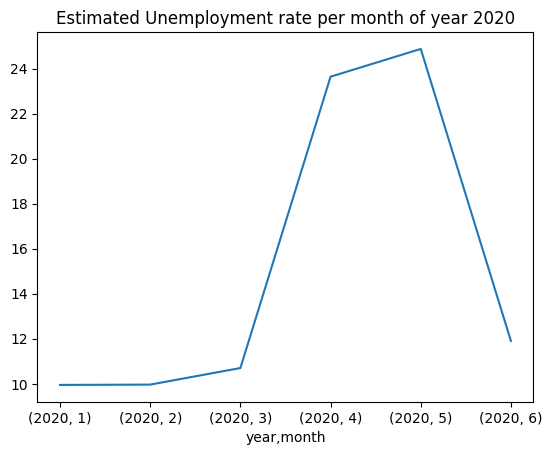

In [ ]:
month_unemployment = df_2020.groupby(['year', 'month'])[' Estimated Unemployment Rate (%)'].mean()
month_unemployment.plot(kind='line' , title='Estimated Unemployment rate per month of year 2020')

<Axes: title={'center': 'Estimated Unemployment Rate of per month of year 2019'}, xlabel='year,month'>

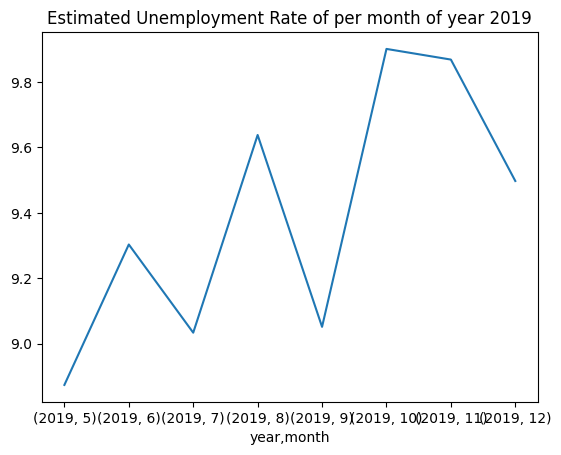

In [ ]:
month_unemployment = df_2019.groupby(['year', 'month'])[' Estimated Unemployment Rate (%)'].mean()
month_unemployment.plot(kind='line',title='Estimated Unemployment Rate of per month of year 2019')

In [ ]:
df = px.data.tips()
fig = px.sunburst(data, path=["Area","Region","year"], values=" Estimated Unemployment Rate (%)",
                   title= 'Unemployment rate in every Area & Region of year 2019 & 2020 ', height=650)
fig.show()

In [ ]:

data.columns=['States','Date','Frequency','Estimated Unemployment rate','Estimated Employed','Estimated Labour participation rate','Region','Longitude','Latitude']
data.head(10)

,States,Date,Frequency,Estimated Unemployment rate,Estimated Employed,Estimated Labour participation rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019,9
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural,2019,10
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural,2019,11
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural,2019,12
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural,2020,1
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural,2020,2


In [ ]:

data.corr()

<ipython-input-25-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Estimated Unemployment rate,Estimated Employed,Estimated Labour participation rate,Longitude,Latitude
Estimated Unemployment rate,1.000000,-0.222876,0.002558,0.262602,-0.122938
Estimated Employed,-0.222876,1.000000,0.011300,-0.031841,0.011285
Estimated Labour participation rate,0.002558,0.011300,1.000000,-0.182460,0.087257
Longitude,0.262602,-0.031841,-0.182460,1.000000,-0.768484
Latitude,-0.122938,0.011285,0.087257,-0.768484,1.000000


<ipython-input-26-8b96879b4d02>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

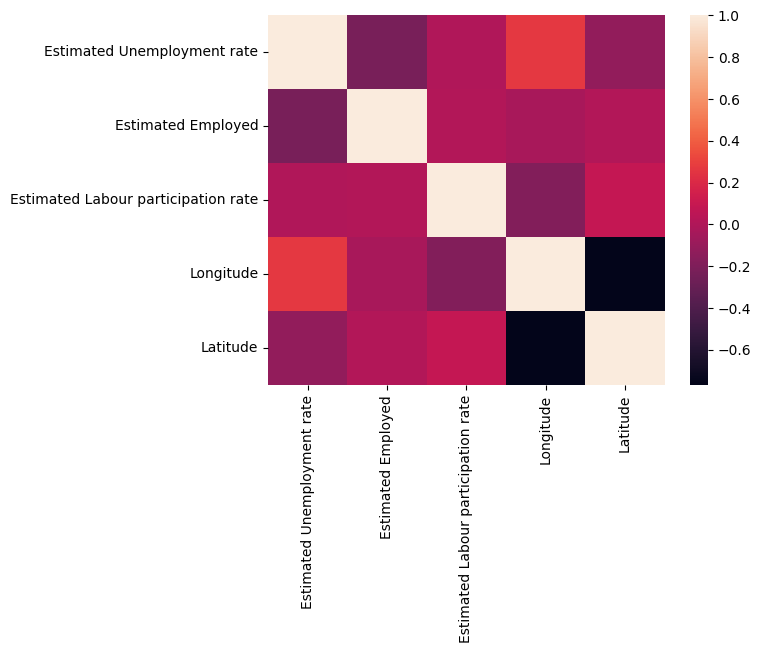

In [ ]:
sns.heatmap(data.corr())